OpenCorpora - Plain text, updated 02.12.2021 05:14 MSK

In [32]:
import pandas as pd
import re
import pymorphy2

In [33]:
PATH_TO_DICTIONARY_SOURCE_DIR = "../../data/dictionaries/source"

In [34]:
PATH_TO_OPENCORPORA_SOURCE_DICT = PATH_TO_DICTIONARY_SOURCE_DIR + "/opencorpora_dict.txt"

In [35]:
with open(PATH_TO_OPENCORPORA_SOURCE_DICT) as file:
    data = file.read()

In [36]:
data_list = data.split(sep="\n\n")

In [37]:
data_list

['1\nЁЖ\tNOUN,anim,masc sing,nomn\nЕЖА\tNOUN,anim,masc sing,gent\nЕЖУ\tNOUN,anim,masc sing,datv\nЕЖА\tNOUN,anim,masc sing,accs\nЕЖОМ\tNOUN,anim,masc sing,ablt\nЕЖЕ\tNOUN,anim,masc sing,loct\nЕЖИ\tNOUN,anim,masc plur,nomn\nЕЖЕЙ\tNOUN,anim,masc plur,gent\nЕЖАМ\tNOUN,anim,masc plur,datv\nЕЖЕЙ\tNOUN,anim,masc plur,accs\nЕЖАМИ\tNOUN,anim,masc plur,ablt\nЕЖАХ\tNOUN,anim,masc plur,loct',
 '2\nЁЖ\tNOUN,inan,masc sing,nomn\nЕЖА\tNOUN,inan,masc sing,gent\nЕЖУ\tNOUN,inan,masc sing,datv\nЁЖ\tNOUN,inan,masc sing,accs\nЕЖОМ\tNOUN,inan,masc sing,ablt\nЕЖЕ\tNOUN,inan,masc sing,loct\nЕЖИ\tNOUN,inan,masc plur,nomn\nЕЖЕЙ\tNOUN,inan,masc plur,gent\nЕЖАМ\tNOUN,inan,masc plur,datv\nЕЖИ\tNOUN,inan,masc plur,accs\nЕЖАМИ\tNOUN,inan,masc plur,ablt\nЕЖАХ\tNOUN,inan,masc plur,loct',
 '3\nЁЖИК\tNOUN,anim,masc sing,nomn\nЁЖИКА\tNOUN,anim,masc sing,gent\nЁЖИКУ\tNOUN,anim,masc sing,datv\nЁЖИКА\tNOUN,anim,masc sing,accs\nЁЖИКОМ\tNOUN,anim,masc sing,ablt\nЁЖИКЕ\tNOUN,anim,masc sing,loct\nЁЖИКИ\tNOUN,anim,masc plur,nomn

In [38]:
words = set()
for record in data_list:
    record_list = record.split("\n")[1:]
    for line in record_list:
        word_list = line.split("\t")[0]
        words.add(word_list.lower())

In [39]:
open_corpora_data = pd.DataFrame(words, columns=["word"])
open_corpora_data.head()

,word
0,двухсотлетьи
1,самопротиворечии
2,припрашивающаяся
3,покарали
4,хулившимися


In [40]:
open_corpora_data["length"] = open_corpora_data.word.map(lambda x: len(x))

In [41]:
open_corpora_data.head()

,word,length
0,двухсотлетьи,12
1,самопротиворечии,16
2,припрашивающаяся,16
3,покарали,8
4,хулившимися,11


<AxesSubplot:>

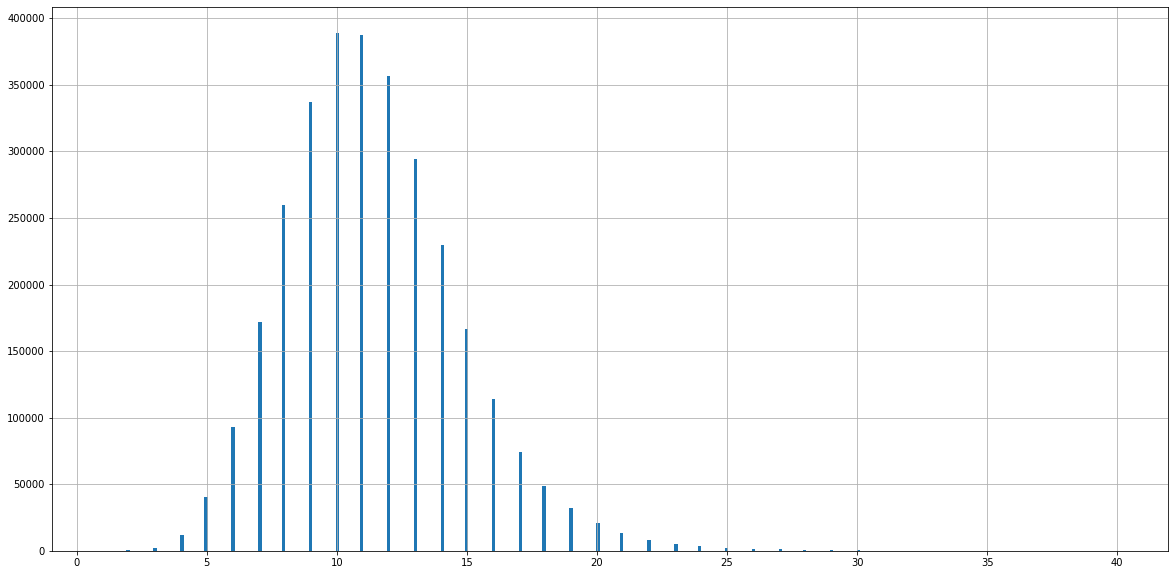

In [42]:
open_corpora_data["length"].hist(bins=300, figsize=(20,10))

In [43]:
open_corpora_data["length"].value_counts()

10    388837
11    387233
12    356360
9     336853
13    294133
8     259636
14    229448
7     171978
15    166427
16    113866
6      92852
17     74252
18     48644
5      40664
19     32347
20     20583
21     13171
4      11724
22      8326
23      5046
24      3343
3       2368
25      2254
26      1464
27      1008
28       627
29       393
30       285
2        243
31       196
32       115
33        64
1         29
34        26
39         9
35         4
36         4
40         3
37         2
Name: length, dtype: int64

In [44]:
open_corpora_data[open_corpora_data["length"] == 1]

,word,length
18025,к,1
113831,х,1
223569,э,1
408168,з,1
471829,а,1
548741,й,1
591476,и,1
827390,т,1
884004,с,1
1190423,н,1


So it contains many one-letter words. Let's delete them since Aspell dict contains all prepositions

In [45]:
open_corpora_data = open_corpora_data[open_corpora_data["length"] != 1]

In [46]:
open_corpora_data[open_corpora_data["length"] > 30]

,word,length
23199,территориально-административной,31
25075,земледельческо-животноводческих,31
53826,окислительно-восстановительному,31
54481,эксплуататорско-монополистический,33
56913,волгограднефтепродуктавтоматикой,32
...,...,...
3032612,старопохвистневоагропромтрансах,31
3034758,хромато-масс-спектрометрическою,31
3041533,конструкционно-теплоизоляционную,32
3046667,пропорционально-дифференциальный,32


In [47]:
open_corpora_data = open_corpora_data.drop(columns=["length"])

In [48]:
open_corpora_data.to_csv("../../data/dictionaries/processed/processed_opencorpora_dict.txt", header=None, index=None, sep=' ', mode='a')

In [49]:
lemmatizer = pymorphy2.MorphAnalyzer()
open_corpora_data = pd.DataFrame(set(open_corpora_data.word.map(lambda word: lemmatizer.parse(word)[0].normal_form)), columns=["word"])

In [50]:
open_corpora_data.head()

,word
0,девать
1,энзима
2,пышка
3,суньятсенизм
4,шеллак


In [51]:
open_corpora_data.to_csv("../../data/dictionaries/processed/processed_lemmatized_opencorpora_dict.txt", header=None, index=None, sep=' ', mode='a')